In [1]:
from classy import Class
import numpy as np


In [2]:
common_settings = {# LambdaCDM parameters/theta

                   '100*theta_s': 1.040909,
                   'omega_b':0.022383,
'A_s':2.633707534927039e-09,
    'Omega_m': 0.3138,#0.3139,
    #        'sigma8':0.773/np.sqrt((0.3144/0.3)),

    'n_s':0.96605,
    'tau_reio':0.0543,

    
    'Omega_Lambda':0,
    
    'l_max_scalars':5000,
    'w0_fld':-1+1e-2,
    'fluid_equation_of_state': 'CLP',
    'gauge':'newtonian',       
    'use_ppf':False,



'z_max_pk':1,
'output':'tCl,lCl,mPk'

}

In [12]:
lcdm_settings = {# LambdaCDM parameters/theta

        'Gamma_DMDE':0,
}
M=Class()
M.set(common_settings)
M.set(lcdm_settings)

M.compute()

import numpy as np
import matplotlib.pyplot as plt
k=np.logspace(-4,np.log10(1),100)
pk_lcdm= np.array(  [M.pk(kk,0)for kk in k])

pk_lcdm_half= np.array( [M.pk(kk,1/2)for kk in k])
pk_lcdm_one= np.array(  [M.pk(kk,1)for kk in k])


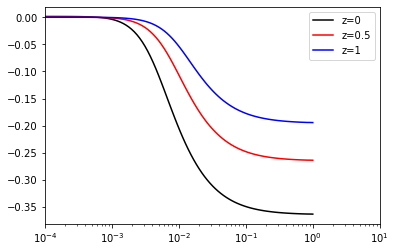

In [13]:
for gamma in [1]:
    
    gamma_settings = {


        'Gamma_DMDE':gamma
    }
    
    M=Class()
    M.set(common_settings)
    M.set(gamma_settings)
    M.compute()

    pk_a=  np.array([M.pk(kk,0)for kk in k])
    plt.semilogx(k,np.array(pk_a-pk_lcdm)/np.array(pk_lcdm),label='z=0',color='black')
    pk_a=  np.array([M.pk(kk,1/2)for kk in k])
    plt.semilogx(k,np.array(pk_a-pk_lcdm_half)/np.array(pk_lcdm_half),label='z=0.5',color='red')
    pk_a= np.array( [M.pk(kk,1)for kk in k])
    plt.semilogx(k,np.array(pk_a-pk_lcdm_one)/np.array(pk_lcdm_one),label='z=1',color='blue')
    
plt.xlim(1e-4,10)
plt.legend()

